In [1]:
import pandas as pd
import numpy as np

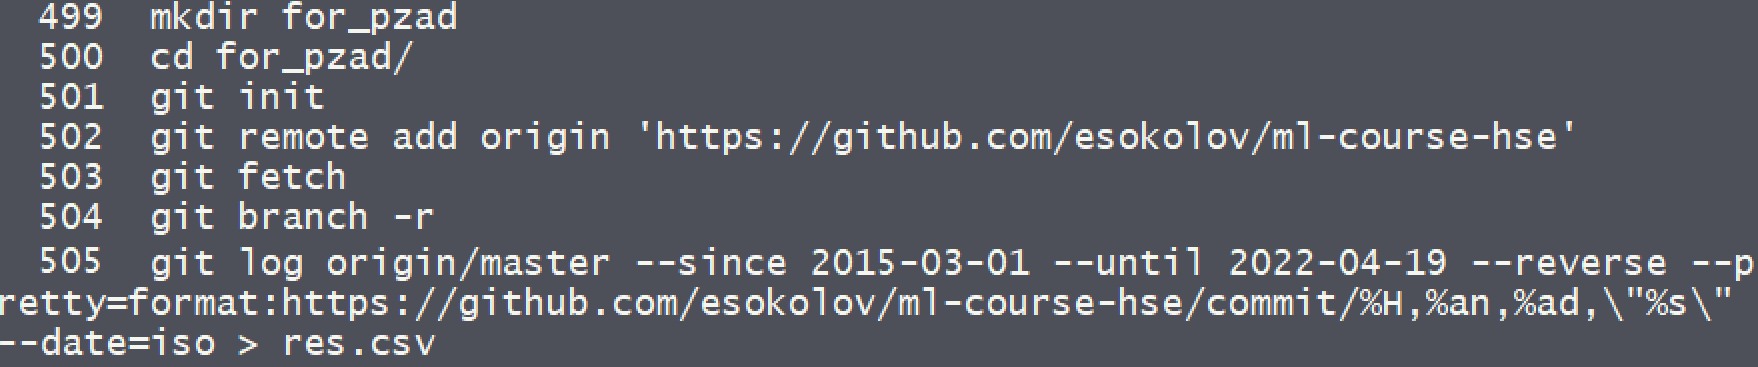

In [2]:
colnames = ['commit', 'author', 'date', 'message']
data = pd.read_csv('res.csv', parse_dates = ['date'], names=colnames, infer_datetime_format=True)
data.head()

,commit,author,date,message
0,https://github.com/esokolov/ml-course-hse/comm...,Evgeny Sokolov,2016-09-04 18:36:26+03:00,Initial commit
1,https://github.com/esokolov/ml-course-hse/comm...,Evgeny Sokolov,2016-09-04 18:40:53+03:00,readme
2,https://github.com/esokolov/ml-course-hse/comm...,Evgeny Sokolov,2016-09-04 18:42:57+03:00,readme
3,https://github.com/esokolov/ml-course-hse/comm...,Evgeny Sokolov,2016-09-06 13:13:37+03:00,1st lecture
4,https://github.com/esokolov/ml-course-hse/comm...,esokolov,2016-09-08 01:34:26+03:00,1st sem


In [3]:
data['for_gb'] = data['date'].apply(lambda x: str(x.year) +' '+ '00'[len(str(x.month)):] + str(x.month))

In [4]:
d = pd.DataFrame(data.groupby(by = 'for_gb')['commit'].count())

In [5]:
rang = pd.date_range('2016-9-1','2022-04-19', freq='MS').strftime("%Y %m").tolist()
to_merge = pd.DataFrame({'for_gb':rang, 'sum':[0 for i in range(len(rang))]})

In [6]:
to_merge.set_index('for_gb', inplace = True)

In [7]:
res = pd.concat([d, to_merge], axis=1).fillna(0)

In [8]:
res['commit_count'] = (res['commit']+res['sum']).astype(int)

In [11]:
res = res.reset_index().drop(columns = ['commit', 'sum'])

In [21]:
res

,for_gb,commit_count
0,2016 09,17
1,2016 10,26
2,2016 11,33
3,2016 12,24
4,2017 01,4
...,...,...
52,2021 12,9
53,2022 01,6
54,2022 02,9
55,2022 03,2


In [19]:
res = res.sort_values(by = 'for_gb')

In [22]:
l = list(res.commit_count)

In [25]:
val = 0
summ = []
for i in l:
    summ.append(i+ val)
    val = i+ val

In [28]:
res['total_commits'] = summ

In [29]:
res

,for_gb,commit_count,total_commits
0,2016 09,17,17
1,2016 10,26,43
2,2016 11,33,76
3,2016 12,24,100
4,2017 01,4,104
...,...,...,...
52,2021 12,9,736
53,2022 01,6,742
54,2022 02,9,751
55,2022 03,2,753


<AxesSubplot:ylabel='total_commits'>

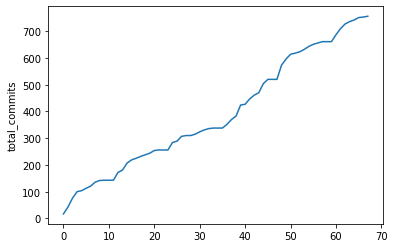

In [30]:
import seaborn as sns
sns.lineplot(data = res, x = np.arange(0, res.shape[0]), y = 'total_commits')

<AxesSubplot:ylabel='commit_count'>

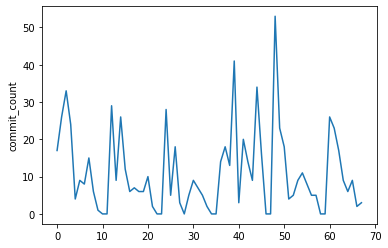

In [31]:
sns.lineplot(data = res, x = np.arange(0, res.shape[0]), y = 'commit_count')

In [32]:
24/56

0.42857142857142855

In [34]:
res

,for_gb,commit_count,total_commits
0,2016 09,17,17
1,2016 10,26,43
2,2016 11,33,76
3,2016 12,24,100
4,2017 01,4,104
...,...,...,...
52,2021 12,9,736
53,2022 01,6,742
54,2022 02,9,751
55,2022 03,2,753


In [35]:
res.drop(columns = 'commit_count').to_csv('ml_commits.csv')